Epoch 1/30
235/235 [==============================] - 2s 6ms/step - loss: 0.3699 - val_loss: 0.3132
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 0.3030 - val_loss: 0.2991
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2940 - val_loss: 0.2934
Epoch 4/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2893 - val_loss: 0.2902
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2861 - val_loss: 0.2899
Epoch 6/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2836 - val_loss: 0.2848
Epoch 7/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2819 - val_loss: 0.2837
Epoch 8/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2804 - val_loss: 0.2822
Epoch 9/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2792 - val_loss: 0.2814
Epoch 10/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2782 - val_loss: 0.2798

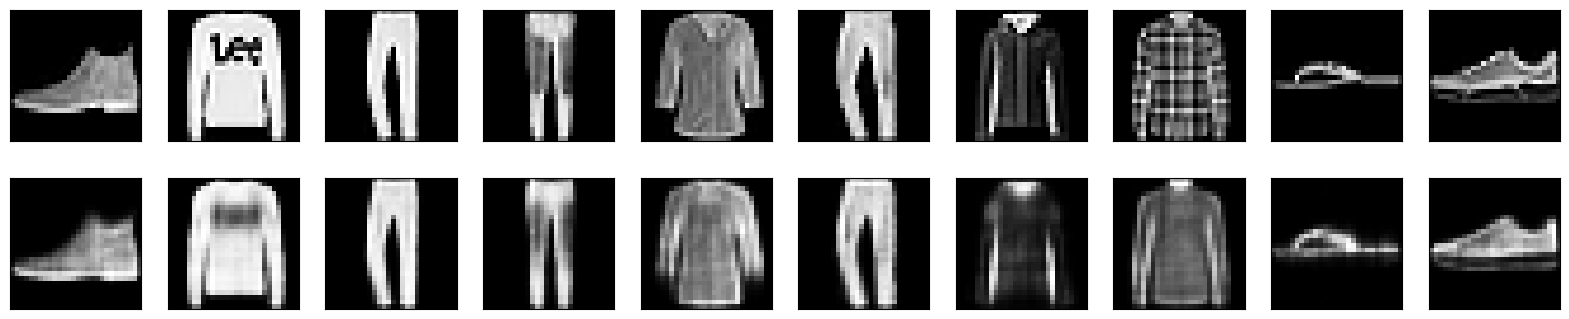

In [7]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalizing the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshaping the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Print train/validation loss
print(history.history['loss'])
print(history.history['val_loss'])

# Compare original and reconstructed images
decoded_imgs = autoencoder.predict(x_test)



n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


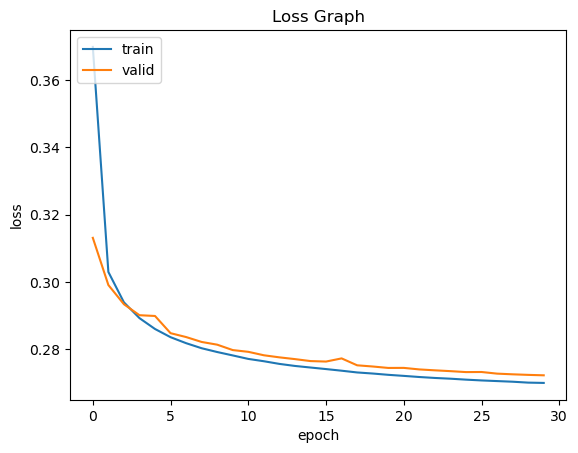

In [8]:
# Plotting original and reconstructed images
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

Epoch 1/20
235/235 [==============================] - 22s 91ms/step - loss: 0.3039 - val_loss: 0.2661
Epoch 2/20
235/235 [==============================] - 22s 93ms/step - loss: 0.2604 - val_loss: 0.2598
Epoch 3/20
235/235 [==============================] - 22s 93ms/step - loss: 0.2561 - val_loss: 0.2567
Epoch 4/20
235/235 [==============================] - 22s 92ms/step - loss: 0.2539 - val_loss: 0.2550
Epoch 5/20
235/235 [==============================] - 22s 93ms/step - loss: 0.2525 - val_loss: 0.2540
Epoch 6/20
235/235 [==============================] - 22s 94ms/step - loss: 0.2515 - val_loss: 0.2532
Epoch 7/20
235/235 [==============================] - 23s 96ms/step - loss: 0.2508 - val_loss: 0.2524
Epoch 8/20
235/235 [==============================] - 22s 96ms/step - loss: 0.2501 - val_loss: 0.2518
Epoch 9/20
235/235 [==============================] - 23s 97ms/step - loss: 0.2496 - val_loss: 0.2515
Epoch 10/20
235/235 [==============================] - 23s 97ms/step - loss: 0.249

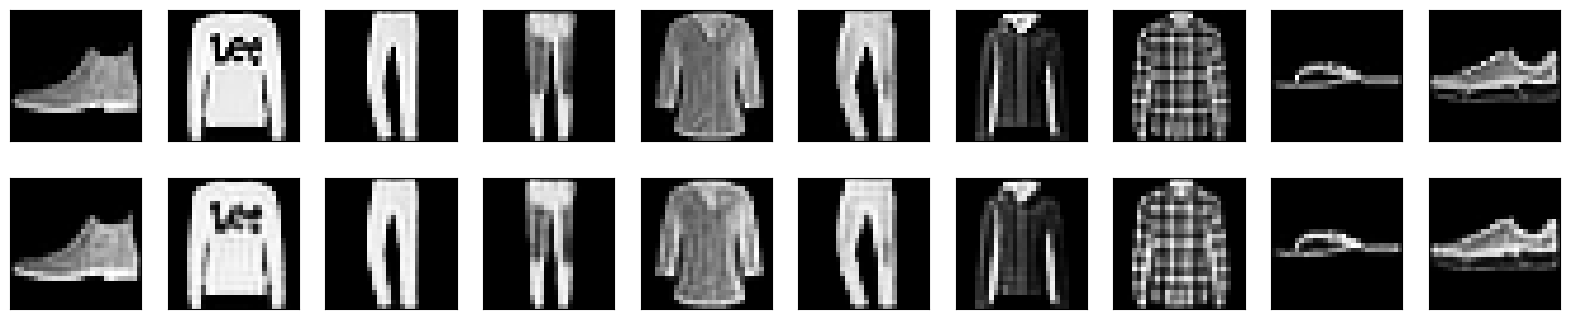

In [9]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Reshape the data to the original shape
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

# Encoding layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoding layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Print train/validation loss
print(history.history['loss'])
print(history.history['val_loss'])

# Compare original and reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Plotting original and reconstructed images

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



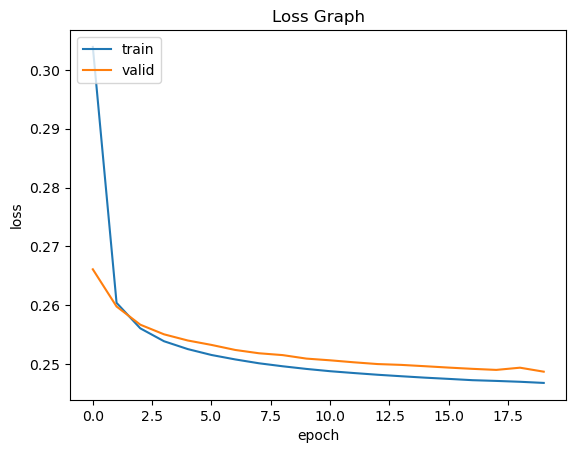

In [10]:
# Plotting original and reconstructed images
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()